# 1- Load the required modules

In [3]:
import numpy as np                     # Llibreria matemÃ tica
import pandas as pd
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb         # Per fer servir el knn
%matplotlib inline

# 2- Load the dataset

In [4]:
twigen = pd.read_csv("dataWithTextWordsPrep.csv", dtype={"gender_gold": str, "profile_yn_gold": str, "tweet_coord": str}, encoding='latin1')
twigen.head()

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,...,evidence,great.,toe,favor,soccer,did.,wheel,shoulder,rank,expected
0,0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,...,0,0,0,0,0,0,0,0,0,0


# 3- Pre-processing

## Leaving only text tweet text

In [5]:
# 3. Pre-processing

twigen = twigen.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at',
               'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created', 'description',
               'fav_number', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
               'sidebar_color', 'text', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location',
               'retweet_count', 'tweet_coord', 'user_timezone'], axis=1);
twigen = twigen.drop(twigen.columns[0], axis=1)
twigen = twigen[twigen.gender.notnull()]
twigen.head()


,gender,you,weather,get,my,from,me,with,that,update,...,evidence,great.,toe,favor,soccer,did.,wheel,shoulder,rank,expected
0,male,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,male,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,male,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,male,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,female,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Separate data from label

In [6]:
def parse_label(gender):
    if gender == 'female': return 0
    if gender == 'male': return 1
    if gender == 'brand': return 2
    assert False # ensure gender is valid

# All values in KNN must be numeric, label included
labels = twigen.gender.apply(parse_label)
data = twigen.drop('gender', axis=1)

print(data.shape)
data.head()

(18836, 2000)


,you,weather,get,my,from,me,with,that,update,be,...,evidence,great.,toe,favor,soccer,did.,wheel,shoulder,rank,expected
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Cross-validation: split data into training and test sets (test 30% of data)
data_train, data_test, labels_train, labels_test = cv.train_test_split(data, labels, test_size=.3, random_state=1)

# 3- Finding the best K: number of neighbors and distance measure function


In [8]:
from sklearn.model_selection import GridSearchCV

limit = 50
cv = 3
limit_range = list(range(1, limit + 1, 3))
print(limit_range)
params = {'n_neighbors': limit_range, 'weights':['distance'] }
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(data, labels)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]
Best Params fo Knn= {'n_neighbors': 49, 'weights': 'distance'} Accuracy= 0.435442769165


[ 0.40719898  0.42190486  0.42572733  0.42349756  0.42440008  0.42291357
  0.42206413  0.42631132  0.43448715  0.4300807   0.42970907  0.43273519
  0.42949671  0.43034615  0.43151412  0.43331918  0.43544277]


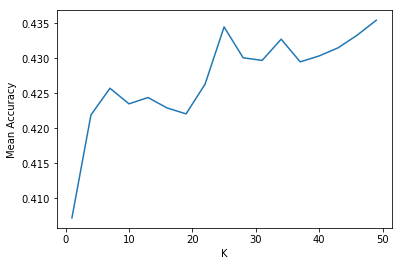

In [9]:
# Ploting library
import numpy as np
import matplotlib.pyplot as plt

# Data
mean = clf.cv_results_['mean_test_score']
l = len(mean)
x = limit_range
y = mean

print(mean)
 
# Plot
plt.plot(x,y)
plt.xlabel('K')
plt.ylabel('Mean Accuracy')
plt.show()

# 4- K-Fold Cross-Validation

In [10]:
import sklearn.model_selection as cv

# Cross-validation: split data into training and test sets (test 30% of data)
kf = cv.KFold(n_splits=10)

a_s = [] # Accuracy
c_m = [] # Confusion Matrix
for train_index, test_index in kf.split(data):
    # Split
    data_train, data_test = pd.core.frame.DataFrame(data,index = train_index, dtype = np.int64), pd.core.frame.DataFrame(data,index = test_index,  dtype = np.int64)
    labels_train, labels_test = pd.Series(labels,index = train_index, dtype = np.int64), pd.Series(labels,index = test_index, dtype = np.int64)
    
    # Training
    twigen.iloc[data_train.head().index]
    
    # Testing
    twigen.iloc[data_test.head().index]
    
    # Fitting
    # Create a kNN classifier object
    knc = nb.KNeighborsClassifier(n_neighbors=49, weights='distance')

    # Train the classifier
    knc.fit(data_train, labels_train)
    pred = knc.predict(data_test)
    c_m.append(sklearn.metrics.confusion_matrix(labels_test,pred))
    a_s.append(sklearn.metrics.accuracy_score(labels_test,pred))
    

AttributeError: 'int' object has no attribute 'KFold'

# 4- Results

In [ ]:
print("ACCURACY SCORE")
print("MEAN "+str(sum(a_s) / kf.n_splits))
print("MAX  "+str(max(a_s)))
print("MIN  "+str(min(a_s)))
